In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

# Data Preprocessing

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# Text Preprocessing

1)Convert uppercase to lowercase
2)Remove links
3)Remove punctuations
4)Remove numbers
5)Remove stopwords
6)Stemming

In [7]:
import re
import string

In [8]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [9]:
#Convert uppercase to lowercase

data['tweet'] = data['tweet'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [11]:
#remove links

data['tweet'] = data['tweet'].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
# Remove Punctuation(we can use lamda function or out function)

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [15]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [16]:
#remove numbers

data['tweet'] = data['tweet'].str.replace('\d+','',regex=True)

In [17]:
data.tail()

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [18]:
pip install --upgrade nltk

Note: you may need to restart the kernel to use updated packages.


In [19]:
#remove stopwors

import nltk

In [20]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [22]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data['tweet']=data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [24]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [25]:
#stemming

from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [26]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [27]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


# Building Vacabulary

In [29]:
from collections import Counter
vocab= Counter()

In [30]:
vocab

Counter()

In [31]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [32]:
vocab

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 414,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 4073,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 348,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 60,
         'sonyexperias…': 1,
         'love': 499,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'know': 106,
         'georg': 1,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'amaz': 178,
         'servic': 51,
         'appl': 2876,
         'wont':

In [33]:
len(vocab)

15949

In [34]:
data.shape

(7920, 3)

In [35]:
tokens = [key for key in vocab if vocab[key] > 10]

In [36]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [37]:
len(tokens)

1145

In [38]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file =open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close()
    
save_vocabulary(tokens, '../static/model/vocabulary.txt')

# Divide Dataset

In [39]:
x= data['tweet']
y=data['label']

In [40]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [42]:
x_train.shape

(6336,)

In [43]:
x_test.shape

(1584,)

# Vectorization


In [44]:
# y_train,y_test is in numarical value. 
# Therefore now we convert to numerical value x_train,x_test

In [45]:
def vectorizer(ds,vocabulary):
    vectorized_list=[]
    
    for sentence in ds:
        sentence_list=np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i]=1
                
        vectorized_list.append(sentence_list)
        
    vectorized_list_new= np.asarray(vectorized_list,dtype=np.float32)
    
    return vectorized_list_new

In [46]:
vectorized_x_train = vectorizer(x_train,tokens)

In [47]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
vectorized_x_test = vectorizer(x_test,tokens)

In [49]:
vectorized_x_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
y_train

7258    0
3430    0
1145    0
3136    0
6493    0
       ..
7262    0
6156    0
4949    1
3885    0
3279    0
Name: label, Length: 6336, dtype: int64

In [51]:
y_test

7019    0
7151    0
2576    1
5714    1
6450    0
       ..
7284    1
3239    0
5236    0
7100    0
6900    0
Name: label, Length: 1584, dtype: int64

In [52]:
y_train.value_counts()

0    4706
1    1630
Name: label, dtype: int64

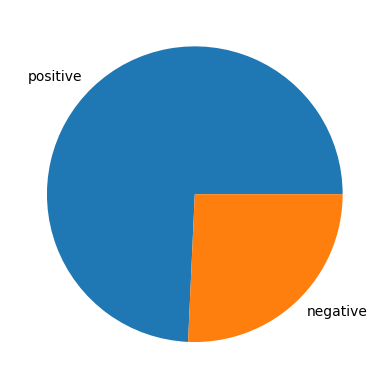

In [53]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['positive','negative'])
plt.show()

# Handle imbalanced dataset

In [54]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote,y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9412, 1145) (9412,)


In [56]:
y_train_smote.value_counts()

0    4706
1    4706
Name: label, dtype: int64

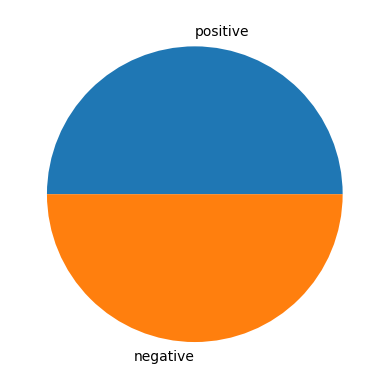

In [57]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels=['positive','negative'])
plt.show()

In [58]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9407    1
9408    1
9409    1
9410    1
9411    1
Name: label, Length: 9412, dtype: int64

In [60]:
vectorized_x_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
y_test

7019    0
7151    0
2576    1
5714    1
6450    0
       ..
7284    1
3239    0
5236    0
7100    0
6900    0
Name: label, Length: 1584, dtype: int64

# Model Traning and Evaluation

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [63]:
#Define a function for determine the traning_score and validation_score in different model

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_score(y_act,y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Traning scores:\n\tAccuracy={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tF1_score={f1}')
    
    
def validation_score(y_act,y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Traning scores:\n\tAccuracy={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tF1_score={f1}')   

# Logistic Regression

In [64]:
lr=LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

LogisticRegression()

In [65]:
y_train_pred=lr.predict(vectorized_x_train_smote)

In [66]:
training_score(y_train_smote,y_train_pred)

Traning scores:
	Accuracy=0.941
	Precision=0.916
	Recall=0.97
	F1_score=0.942


In [67]:
y_test_pred=lr.predict(vectorized_x_test)

In [68]:
validation_score(y_test,y_test_pred)

Traning scores:
	Accuracy=0.862
	Precision=0.677
	Recall=0.856
	F1_score=0.756


# Naive Bayes

In [69]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_score(y_train_smote, y_train_pred)

validation_score(y_test,y_test_pred)

Traning scores:
	Accuracy=0.906
	Precision=0.87
	Recall=0.955
	F1_score=0.911
Traning scores:
	Accuracy=0.856
	Precision=0.652
	Recall=0.909
	F1_score=0.759


# Decision Tree

In [70]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_score(y_train_smote, y_train_pred)

validation_score(y_test,y_test_pred)

Traning scores:
	Accuracy=1.0
	Precision=1.0
	Recall=1.0
	F1_score=1.0
Traning scores:
	Accuracy=0.827
	Precision=0.647
	Recall=0.677
	F1_score=0.662


# Random Forest

In [71]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_score(y_train_smote, y_train_pred)

validation_score(y_test,y_test_pred)

Traning scores:
	Accuracy=1.0
	Precision=1.0
	Recall=1.0
	F1_score=1.0
Traning scores:
	Accuracy=0.869
	Precision=0.749
	Recall=0.715
	F1_score=0.731


# Support Vector Machine

In [72]:
svm= SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_score(y_train_smote, y_train_pred)

validation_score(y_test,y_test_pred)

Traning scores:
	Accuracy=0.979
	Precision=0.962
	Recall=0.997
	F1_score=0.979
Traning scores:
	Accuracy=0.869
	Precision=0.71
	Recall=0.806
	F1_score=0.755


In [73]:
import pickle
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)